In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### DIC in the water column

In [2]:
ds = xr.open_dataset('data/base/kz145_scale10000/water.nc')
dic_df = ds['B_C_DIC'].to_dataframe()
dic_surface = dic_df.groupby('z').get_group(1.250)
dic = dic_surface.loc['2011-01-01':'2011-12-31']

In [3]:
ds = xr.open_dataset('data/with_no_bio/no_fluxes/water.nc')
dic_df = ds['B_C_DIC'].to_dataframe()
dic_surface = dic_df.groupby('z').get_group(1.250)
dic_2 = dic_surface.loc['2011-01-01':'2011-12-31']

In [4]:
dic = dic.reset_index()
dic_2 = dic_2.reset_index()

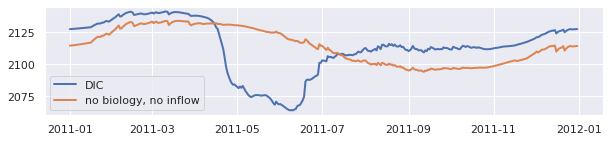

In [5]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dic['time'], dic['B_C_DIC'], linewidth=2, label=r'DIC')
ax.plot(dic_2['time'], dic_2['B_C_DIC'],
        linewidth=2, label=r'no biology, no inflow')
ax.legend(loc='best');

In [6]:
dic['B_C_DIC'].values.mean()  # no inflow

2113.592

In [7]:
dic_2['B_C_DIC'].values.mean()  # with inflow

2114.1772

#### TA in the water column

In [8]:
ds = xr.open_dataset('data/base/kz145_scale10000/water.nc')
alk_df = ds['B_C_Alk'].to_dataframe()
alk_surface = alk_df.groupby('z').get_group(1.250)
alk = alk_surface.loc['2011-01-01':'2011-12-31']

In [9]:
ds = xr.open_dataset('data/with_no_bio/no_fluxes/water.nc')
alk_df = ds['B_C_Alk'].to_dataframe()
alk_surface = alk_df.groupby('z').get_group(1.250)
alk_2 = alk_surface.loc['2011-01-01':'2011-12-31']

In [10]:
alk = alk.reset_index()
alk_2 = alk_2.reset_index()

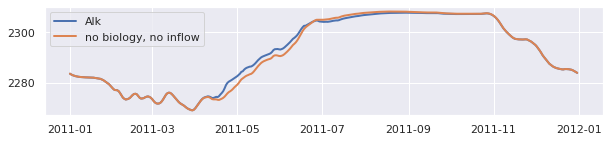

In [11]:
fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(1, 1, 1)
ax.plot(alk['time'], alk['B_C_Alk'], linewidth=2, label=r'Alk')
ax.plot(alk_2['time'], alk_2['B_C_Alk'],
        linewidth=2, label=r'no biology, no inflow')
ax.legend(loc='upper left');

In [12]:
alk['B_C_Alk'].values.mean()  # no inflow

2292.4385

In [13]:
alk_2['B_C_Alk'].values.mean()  # with inflow

2292.1367

#### The water column pCO$_2$

In [14]:
ds = xr.open_dataset('data/base/kz145_scale10000/water.nc')
co2_df = ds['B_C_pCO2'].to_dataframe()
co2_surface = co2_df.groupby('z').get_group(1.250)
co2_no = co2_surface.loc['2011-01-01':'2011-12-31']

In [15]:
ds = xr.open_dataset('data/with_no_bio/no_fluxes/water.nc')
co2_df = ds['B_C_pCO2'].to_dataframe()
co2_surface = co2_df.groupby('z').get_group(1.250)
co2_2 = co2_surface.loc['2011-01-01':'2011-12-31']

In [16]:
co2_no = co2_no.reset_index()
co2_2 = co2_2.reset_index()

In [17]:
co2_no['B_C_pCO2'] *= 1e6 # to convert to ppm
co2_2['B_C_pCO2'] *= 1e6

In [18]:
atm_pCO2 = 390 # to be comparable with Thomas 2004

In [19]:
dco2_no = co2_no['B_C_pCO2']-atm_pCO2
dco2_2 = co2_2['B_C_pCO2']-atm_pCO2

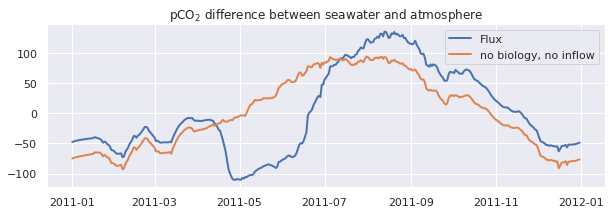

In [20]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(co2_no['time'], dco2_no, linewidth=2, label=r'Flux')
ax.plot(co2_2['time'], dco2_2,
        linewidth=2, label=r'no biology, no inflow')
plt.title('pCO$_2$ difference between seawater and atmosphere')
ax.legend(loc='best');

In [21]:
co2_no['B_C_pCO2'].mean()  # no flux

391.24615

In [23]:
co2_2['B_C_pCO2'].mean()  # with flux

391.2366

In [24]:
dco2_no.mean()

1.2461393

In [25]:
dco2_2.mean()

1.236601

#### Surface fluxes of CO$_2$

In [24]:
import numpy as np
import pandas as pd

In [25]:
ds = xr.open_dataset('data/base/kz145_scale10000/water.nc')
co2flux_df = ds['B_C_DIC   _flux'].to_dataframe()
co2flux_surface = co2flux_df.groupby('z_faces').get_group(0)
co2flux_no = -co2flux_surface.loc['2011-01-01':'2011-12-31']

In [26]:
ds = xr.open_dataset('data/with_no_bio/no_fluxes/water.nc')
co2flux_df = ds['B_C_DIC   _flux'].to_dataframe()
co2flux_surface = co2flux_df.groupby('z_faces').get_group(0)
co2flux_alk = -co2flux_surface.loc['2011-01-01':'2011-12-31']

*Calculate the monthly CO$_2$ flux*

In [27]:
year = (('2011-01-01','2011-01-31'), ('2011-02-01','2011-02-28'), ('2011-03-01','2011-03-31'),
        ('2011-04-01','2011-04-30'), ('2011-05-01','2011-05-31'), ('2011-06-01','2011-06-30'),
        ('2011-07-01','2011-07-31'), ('2011-08-01','2011-08-31'), ('2011-09-01','2011-09-30'),
        ('2011-10-01','2011-10-31'), ('2011-11-01','2011-11-30'), ('2011-12-01','2011-12-31'))

In [28]:
co2flux_no_year = []
co2flux_alk_year = []

In [29]:
for month in year:
    co2flux_no_month = co2flux_no.loc[month[0]:month[1]]
    co2flux_alk_month = co2flux_alk.loc[month[0]:month[1]]
    co2flux_no_year.append(co2flux_no_month['B_C_DIC   _flux'].mean())
    co2flux_alk_year.append(co2flux_alk_month['B_C_DIC   _flux'].mean())

In [30]:
co2flux_no_year = np.array(co2flux_no_year)
co2flux_alk_year = np.array(co2flux_alk_year)
year_days = np.array([31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])

In [31]:
co2flux_no_monthly = co2flux_no_year*year_days/1000
co2flux_alk_monthly = co2flux_alk_year*year_days/1000

In [32]:
dates = pd.date_range('2011-01-01', '2012-01-01', freq='M')

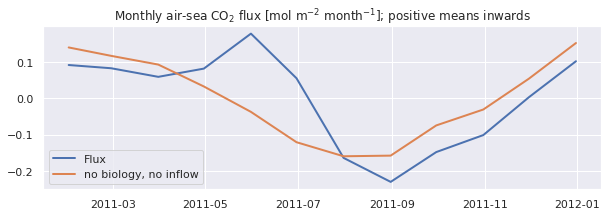

In [33]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(dates, co2flux_no_monthly, linewidth=2, label=r'Flux')
ax.plot(dates, co2flux_alk_monthly,
        linewidth=2, label=r'no biology, no inflow')
plt.title('Monthly air-sea CO$_2$ flux [mol m$^{-2}$ month$^{-1}$]; positive means inwards')
ax.legend(loc='best');

*Show daily CO$_2$ flux*

In [34]:
co2flux_no = co2flux_no.reset_index()
co2flux_alk = co2flux_alk.reset_index()

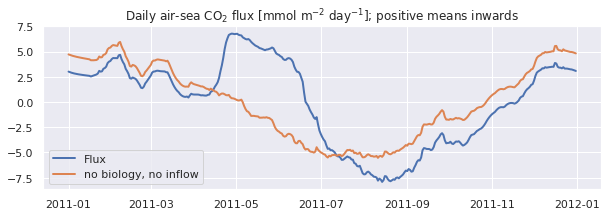

In [35]:
fig = plt.figure(figsize=(10, 3))
ax = fig.add_subplot(1, 1, 1)
ax.plot(co2flux_no['time'], co2flux_no['B_C_DIC   _flux'], linewidth=2, label=r'Flux')
ax.plot(co2flux_alk['time'], co2flux_alk['B_C_DIC   _flux'],
        linewidth=2, label=r'no biology, no inflow')
plt.title('Daily air-sea CO$_2$ flux [mmol m$^{-2}$ day$^{-1}$]; positive means inwards')
ax.legend(loc='best');

In [36]:
co2flux_no['B_C_DIC   _flux'].values.sum()

6.528015

In [37]:
co2flux_alk['B_C_DIC   _flux'].values.sum()  # CO2 [mmol m-2 year-1] seawater excreets

3.895111